# Results analysis

## Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import functions as fn 

## Parameters

In [2]:
# Paths
RESULTS_PATH: str = "./results"
LOGS_PATH: str = f"{RESULTS_PATH}/logs"
GA_RESULTS_PATH: str = f"{LOGS_PATH}/GA results.csv"
ACO_RESULTS_PATH: str = f"{LOGS_PATH}/ACO results.csv"
GA_ACO_RESULTS_PATH: str = f"{LOGS_PATH}/GA-ACO results.csv"
GA_RESULTS_AGGREGATED_PATH: str = f"{LOGS_PATH}/GA results aggregated.csv"
ACO_RESULTS_AGGREGATED_PATH: str = f"{LOGS_PATH}/ACO results aggregated.csv"
GA_ACO_RESULTS_AGGREGATED_PATH: str = f"{LOGS_PATH}/GA-ACO results aggregated.csv"
GA_STATISTICS_PATH: str = f"{LOGS_PATH}/GA statistics.csv"
ACO_STATISTICS_PATH: str = f"{LOGS_PATH}/ACO statistics.csv"
GA_ACO_STATISTICS_PATH: str = f"{LOGS_PATH}/GA-ACO statistics.csv"

# Categorical columns
GA_CATEGORICAL_COLUMNS = ["Crossover Type", "Progressive Mutation", "Bias"]
ACO_CATEGORICAL_COLUMNS = ["Alpha", "Beta", "Revisit Possible"]
GA_ACO_CATEGORICAL_COLUMNS = ["Progressive Mutation", "Bias", "Alpha", "Beta", "Revisit Possible"]

# Other
LINE: str = '-' * 100
DOUBLE_LINE: str = '=' * 100

## GA results

### Loading GA results as a DataFrame

In [3]:
ga_results = pd.read_csv(GA_RESULTS_PATH)

ga_results.head(10)

,Simulation,Random State,Crossover Type,Progressive Mutation,Bias,First Full Path Generation,Best Generation,Best Score,Best Secondary Score,Total Time,Generations Per Second
0,1,10,all to all,True,1.5,NaN,295,2.8284,18,6.39,156.49
1,2,10,best to rest,True,1.5,NaN,659,3.1623,14,5.21,191.94
2,3,10,hybrid,True,1.5,NaN,537,2.2361,15,4.55,219.78
3,4,10,all to all,False,1.5,NaN,267,2.2361,17,6.78,147.49
4,5,10,best to rest,False,1.5,NaN,40,2.2361,27,6.21,161.03
5,6,10,hybrid,False,1.5,NaN,12,3.1623,30,8.92,112.11
6,7,10,all to all,True,3.0,NaN,271,2.8284,18,8.26,121.07
7,8,10,best to rest,True,3.0,NaN,884,2.2361,21,6.69,149.48
8,9,10,hybrid,True,3.0,NaN,677,2.2361,13,5.67,176.37
9,10,10,all to all,False,3.0,NaN,30,2.2361,15,9.88,101.21


### Removing Random State Column

In [4]:
ga_results.drop(columns=["Random State"], inplace=True)

### Checking missing values and dropping rows and columns with missing values

In [5]:
_, ga_missing_columns = fn.check_missing_values(
    dataframe = ga_results,
    double_line = DOUBLE_LINE, 
    line = LINE, 
    return_missing = True
)

ga_results = ga_results.drop(columns=ga_missing_columns)

Missing values check:
First Full Path Generation missing 120 values out of 120 values (100.00%)


### Statistic analysis

In [6]:
ga_statistic = ga_results.describe()
ga_statistic = ga_statistic.drop(index="count")
ga_statistic = ga_statistic.round(2)
ga_statistic = ga_statistic.drop(columns=["Bias"])

ga_statistic.to_csv(GA_STATISTICS_PATH, index=False)

ga_statistic.head(7)

,Simulation,Best Generation,Best Score,Best Secondary Score,Total Time,Generations Per Second
mean,60.50,309.08,2.54,18.58,8.36,123.89
std,34.79,297.22,0.37,5.14,1.51,24.54
min,1.00,12.00,2.24,13.00,4.55,89.77
25%,30.75,28.75,2.24,14.75,7.22,103.57
50%,60.50,269.00,2.24,17.50,8.40,119.12
75%,90.25,567.50,2.83,21.00,9.66,138.55
max,120.00,884.00,3.16,30.00,11.14,219.78


### Aggregate results by categorical values

In [7]:
ga_results_aggregated = fn.aggregate_categorical_results(
    dataframe = ga_results, 
    categorical_columns = GA_CATEGORICAL_COLUMNS
)

ga_results_aggregated.to_csv(GA_RESULTS_AGGREGATED_PATH, index=False)

ga_results_aggregated.head(12)

,Simulation,Crossover Type,Progressive Mutation,Bias,Best Generation,Best Score,Best Secondary Score,Total Time,Generations Per Second
0,58.0,all to all,False,1.5,267.0,2.24,17.0,9.84,103.63
1,64.0,all to all,False,3.0,30.0,2.24,15.0,10.34,96.90
2,55.0,all to all,True,1.5,295.0,2.83,18.0,9.48,107.55
3,61.0,all to all,True,3.0,271.0,2.83,18.0,9.65,104.27
4,59.0,best to rest,False,1.5,40.0,2.24,27.0,8.90,114.08
5,65.0,best to rest,False,3.0,25.0,2.83,14.0,8.29,121.38
6,56.0,best to rest,True,1.5,659.0,3.16,14.0,7.38,138.30
7,62.0,best to rest,True,3.0,884.0,2.24,21.0,7.52,133.92
8,60.0,hybrid,False,1.5,12.0,3.16,30.0,7.87,129.73
9,66.0,hybrid,False,3.0,12.0,2.24,21.0,7.80,129.69


### Results vizualization

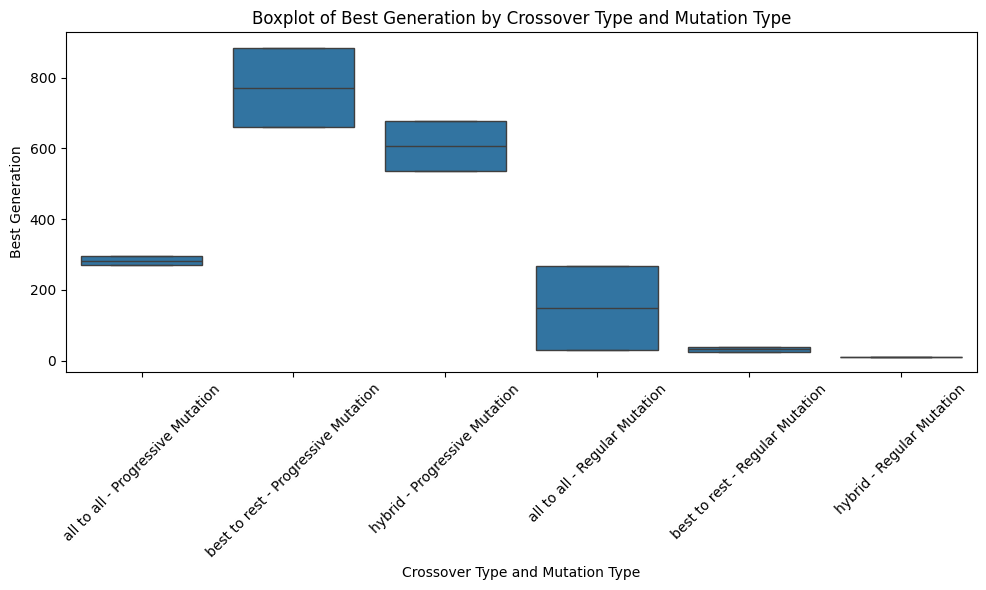

In [8]:
ga_visualization = ga_results.copy()

ga_visualization["Crossover-Mutation Combination"] = ga_visualization.apply(
    lambda row: f"{row['Crossover Type']} - {'Progressive Mutation' if row['Progressive Mutation'] else 'Regular Mutation'}", 
    axis=1
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_visualization, x="Crossover-Mutation Combination", y="Best Generation")
plt.title("Boxplot of Best Generation by Crossover Type and Mutation Type")
plt.xlabel("Crossover Type and Mutation Type")
plt.ylabel("Best Generation")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

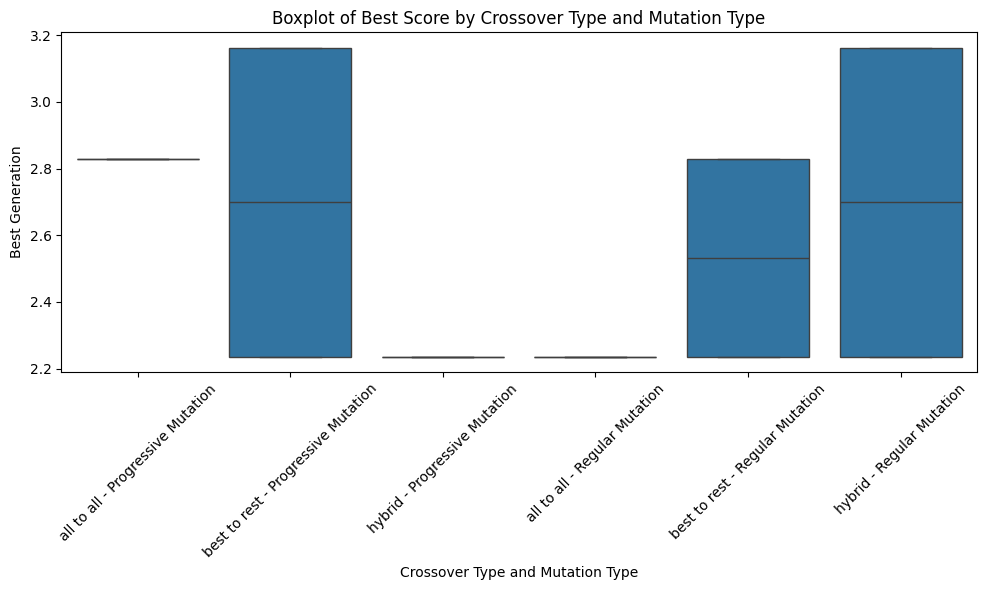

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_visualization, x="Crossover-Mutation Combination", y="Best Score")
plt.title("Boxplot of Best Score by Crossover Type and Mutation Type")
plt.xlabel("Crossover Type and Mutation Type")
plt.ylabel("Best Generation")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

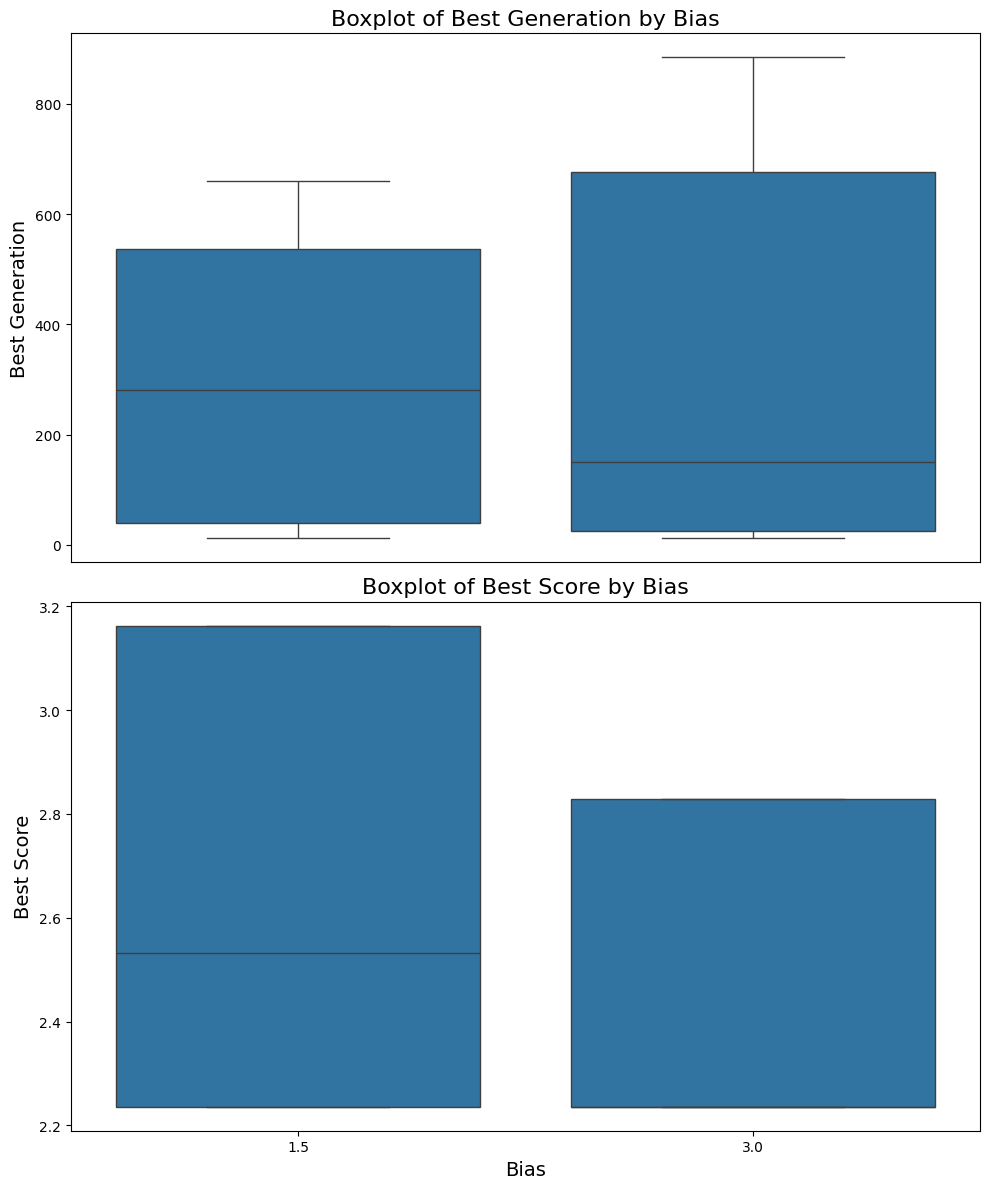

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharey=False)

sns.boxplot(data=ga_visualization, x="Bias", y="Best Generation", ax=axes[0])
axes[0].set_title("Boxplot of Best Generation by Bias", fontsize=16)
axes[0].set_ylabel("Best Generation", fontsize=14)
axes[0].set_xlabel("")  # Removes the x-axis label
axes[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)  

sns.boxplot(data=ga_visualization, x="Bias", y="Best Score", ax=axes[1])
axes[1].set_title("Boxplot of Best Score by Bias", fontsize=16)
axes[1].set_ylabel("Best Score", fontsize=14)
axes[1].set_xlabel("Bias", fontsize=14)

plt.tight_layout()
plt.show()

## ACO results

### Load ACO results as a DataFrame

In [11]:
aco_results = pd.read_csv(ACO_RESULTS_PATH)

aco_results.head(10)

,Simulation,Random State,Alpha,Beta,Revisit Possible,First Full Path,First Optimal Path,Convergence Iteration,Total Time,Iterations Per Second
0,1,10,1.5,1.5,True,33,36.0,39.0,2.12,18.40
1,2,10,1.5,3.0,True,4,5.0,41.0,1.86,22.04
2,3,10,3.0,1.5,True,33,35.0,254.0,10.83,23.45
3,4,10,3.0,3.0,True,4,5.0,6.0,0.34,17.65
4,5,10,1.5,1.5,False,2,3.0,22.0,0.75,29.33
5,6,10,1.5,3.0,False,1,1.0,10.0,0.31,32.26
6,7,10,3.0,1.5,False,2,3.0,6.0,0.18,33.33
7,8,10,3.0,3.0,False,1,1.0,5.0,0.15,33.33
8,9,20,1.5,1.5,True,250,254.0,NaN,62.29,16.05
9,10,20,1.5,3.0,True,2,4.0,9.0,0.75,12.00


### Removing Random State Column

In [12]:
aco_results.drop(columns=["Random State"], inplace=True)

### Checking missing values and dropping rows and columns with missing values

In [13]:
aco_missing_results, _ = fn.check_missing_values(
    dataframe = aco_results,
    double_line = DOUBLE_LINE, 
    line = LINE, 
    return_missing = True 
)

aco_results.dropna(inplace=True)

Missing values check:
First Optimal Path missing 5 values out of 80 values (6.25%)
----------------------------------------------------------------------------------------------------
Convergence Iteration missing 8 values out of 80 values (10.00%)


In [14]:
aco_missing_results.head(8)

,Simulation,Alpha,Beta,Revisit Possible,First Full Path,First Optimal Path,Convergence Iteration,Total Time,Iterations Per Second
8,9,1.5,1.5,True,250,254.0,NaN,62.29,16.05
40,41,1.5,1.5,True,96,NaN,NaN,62.73,15.94
46,47,3.0,1.5,False,1,3.0,NaN,59.61,16.78
50,51,3.0,1.5,True,586,NaN,NaN,73.68,13.57
62,63,3.0,1.5,False,1,NaN,NaN,58.41,17.12
66,67,3.0,1.5,True,25,NaN,NaN,67.65,14.78
68,69,1.5,1.5,False,1,6.0,NaN,62.20,16.08
70,71,3.0,1.5,False,1,NaN,NaN,61.63,16.23


### Statistic analysis

In [15]:
aco_statistic = aco_results.describe()
aco_statistic = aco_statistic.drop(index="count")
aco_statistic = aco_statistic.round(2)
aco_statistic = aco_statistic.drop(columns=["Alpha", "Beta"])

aco_statistic.to_csv(ACO_STATISTICS_PATH, index=False)

aco_statistic.head(7)

,Simulation,First Full Path,First Optimal Path,Convergence Iteration,Total Time,Iterations Per Second
mean,39.19,24.15,25.89,68.58,4.53,20.02
std,23.27,77.57,78.94,147.65,9.95,7.38
min,1.00,1.00,1.00,3.00,0.12,10.26
25%,19.75,1.00,2.00,6.00,0.26,14.50
50%,37.50,1.50,3.00,11.00,0.52,17.88
75%,58.25,6.50,9.25,54.25,3.26,23.47
max,80.00,586.00,600.00,840.00,52.19,35.00


### Aggregate results by categorical values

In [16]:
aco_results_aggregated = fn.aggregate_categorical_results(
    dataframe = aco_results, 
    categorical_columns = ACO_CATEGORICAL_COLUMNS
)

aco_results_aggregated.to_csv(ACO_RESULTS_AGGREGATED_PATH, index=False)

aco_results_aggregated.head(8)

,Simulation,Alpha,Beta,Revisit Possible,First Full Path,First Optimal Path,Convergence Iteration,Total Time,Iterations Per Second
0,37.89,1.5,1.5,False,1.11,2.67,11.67,0.46,26.45
1,40.00,1.5,1.5,True,118.38,123.00,213.25,15.86,14.09
2,42.00,1.5,3.0,False,1.00,1.70,8.50,0.36,25.61
3,38.00,1.5,3.0,True,3.60,6.00,178.90,10.56,16.72
4,35.57,3.0,1.5,False,1.14,2.14,5.57,0.25,24.30
5,34.00,3.0,1.5,True,85.25,87.00,116.62,8.31,13.52
6,44.00,3.0,3.0,False,1.00,1.60,4.70,0.22,22.94
7,40.00,3.0,3.0,True,3.60,5.20,23.40,1.53,15.95


### Results vizualization

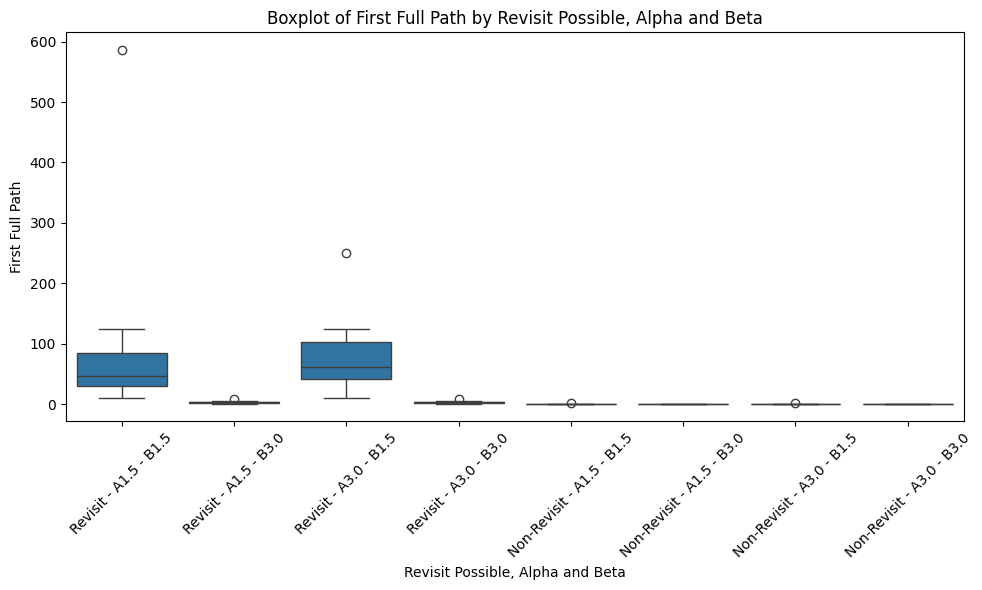

In [17]:
aco_visualization = aco_results.copy()

aco_visualization["Revisit-Alpha-Beta Combination"] = aco_visualization.apply(
    lambda row: f"{'Revisit' if row['Revisit Possible'] else 'Non-Revisit'} - A{row['Alpha']} - B{row['Beta']}", 
    axis=1
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=aco_visualization, x="Revisit-Alpha-Beta Combination", y="First Full Path")
plt.title("Boxplot of First Full Path by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("First Full Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

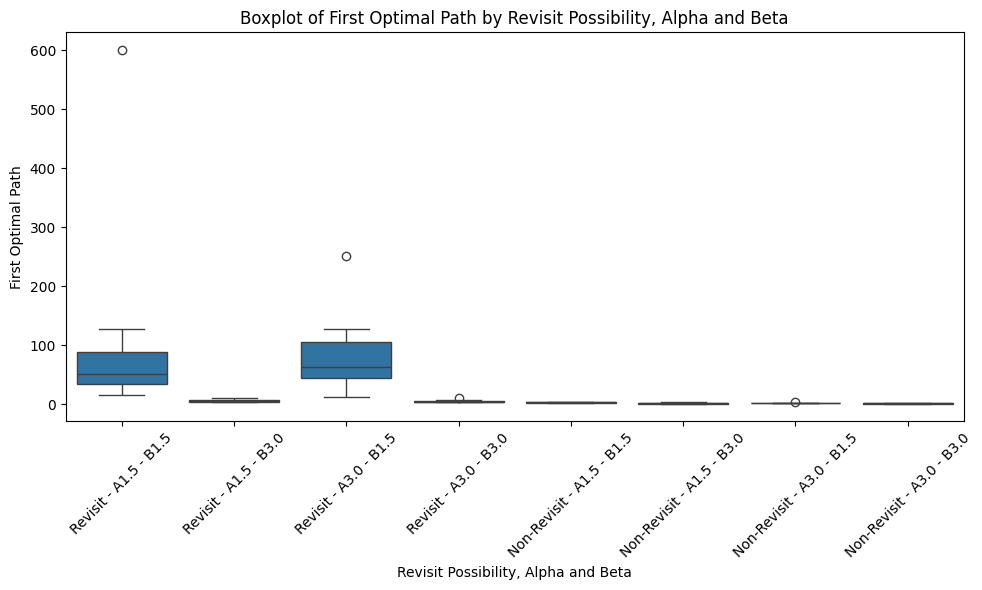

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aco_visualization, x="Revisit-Alpha-Beta Combination", y="First Optimal Path")
plt.title("Boxplot of First Optimal Path by Revisit Possibility, Alpha and Beta")
plt.xlabel("Revisit Possibility, Alpha and Beta")
plt.ylabel("First Optimal Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

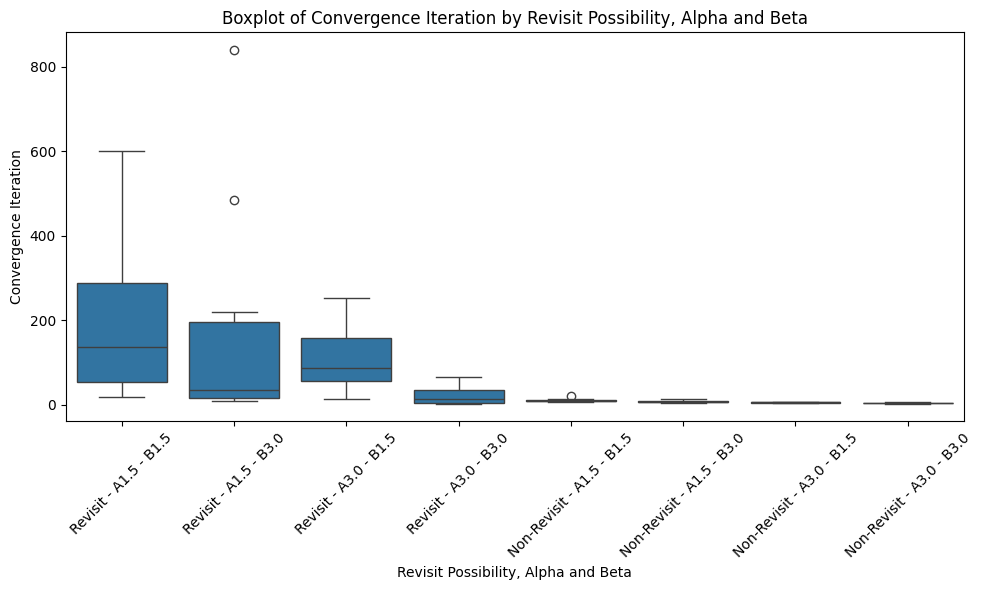

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aco_visualization, x="Revisit-Alpha-Beta Combination", y="Convergence Iteration")
plt.title("Boxplot of Convergence Iteration by Revisit Possibility, Alpha and Beta")
plt.xlabel("Revisit Possibility, Alpha and Beta")
plt.ylabel("Convergence Iteration")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## GA-ACO results

### Load combined GA-ACO results as a DataFrame

In [20]:
ga_aco_results = pd.read_csv(GA_ACO_RESULTS_PATH)

ga_aco_results.head(10)

,Simulation,Random State,Progressive Mutation,Bias,Revisit Possible,Alpha,Beta,GA Best Generation,GA Final Best Score,GA Final Best Secondary Score,GA Total Time,ACO First Full Path,ACO First Optimal Path,ACO Convergence Iteration,ACO Total Time,ACO Iterations Per Second,Total Time
0,1,10,True,1.5,True,1.5,1.5,9,4.0000,30,0.22,4,6.0,18.0,0.67,26.87,0.89
1,2,10,True,1.5,True,1.5,3.0,9,4.0000,30,0.22,3,NaN,NaN,56.99,17.55,57.21
2,3,10,True,1.5,True,3.0,1.5,9,4.0000,30,0.38,11,13.0,18.0,1.11,16.22,1.49
3,4,10,True,1.5,True,3.0,3.0,9,4.0000,30,0.22,1,2.0,4.0,0.16,25.00,0.38
4,5,10,True,1.5,False,1.5,1.5,9,4.0000,30,0.22,1,3.0,NaN,59.10,16.92,59.32
5,6,10,True,1.5,False,1.5,3.0,9,4.0000,30,0.38,1,3.0,NaN,63.98,15.63,64.36
6,7,10,True,1.5,False,3.0,1.5,9,4.0000,30,0.38,1,2.0,7.0,0.43,16.28,0.82
7,8,10,True,1.5,False,3.0,3.0,9,4.0000,30,0.38,1,2.0,NaN,69.45,14.40,69.84
8,9,10,False,1.5,True,1.5,1.5,12,3.1623,30,0.45,4,8.0,52.0,3.40,15.29,3.86
9,10,10,False,1.5,True,1.5,3.0,12,3.1623,30,0.45,11,13.0,20.0,1.59,12.58,2.04


### Removing Random State Column

In [21]:
ga_aco_results.drop(columns=["Random State"], inplace=True)

### Checking missing values and dropping rows and columns with missing values

In [22]:
ga_aco_missing_results, _ = fn.check_missing_values(
    dataframe = ga_aco_results,
    double_line = DOUBLE_LINE, 
    line = LINE, 
    return_missing = True 
)

ga_aco_results.dropna(inplace=True)

Missing values check:
ACO First Optimal Path missing 20 values out of 320 values (6.25%)
----------------------------------------------------------------------------------------------------
ACO Convergence Iteration missing 37 values out of 320 values (11.56%)


In [23]:
ga_aco_missing_results.head(37)

,Simulation,Progressive Mutation,Bias,Revisit Possible,Alpha,Beta,GA Best Generation,GA Final Best Score,GA Final Best Secondary Score,GA Total Time,ACO First Full Path,ACO First Optimal Path,ACO Convergence Iteration,ACO Total Time,ACO Iterations Per Second,Total Time
1,2,True,1.5,True,1.5,3.0,9,4.0000,30,0.22,3,NaN,NaN,56.99,17.55,57.21
4,5,True,1.5,False,1.5,1.5,9,4.0000,30,0.22,1,3.0,NaN,59.10,16.92,59.32
5,6,True,1.5,False,1.5,3.0,9,4.0000,30,0.38,1,3.0,NaN,63.98,15.63,64.36
7,8,True,1.5,False,3.0,3.0,9,4.0000,30,0.38,1,2.0,NaN,69.45,14.40,69.84
12,13,False,1.5,False,1.5,1.5,12,3.1623,30,0.45,1,NaN,NaN,59.16,16.90,59.61
13,14,False,1.5,False,1.5,3.0,12,3.1623,30,0.45,1,NaN,NaN,58.84,17.00,59.30
14,15,False,1.5,False,3.0,1.5,12,3.1623,30,0.26,2,NaN,NaN,62.53,15.99,62.79
15,16,False,1.5,False,3.0,3.0,12,3.1623,30,0.45,3,NaN,NaN,63.12,15.84,63.57
35,36,True,1.5,True,3.0,3.0,9,4.0000,30,0.38,4,NaN,NaN,67.14,14.89,67.52
39,40,True,1.5,False,3.0,3.0,9,4.0000,30,0.38,1,2.0,NaN,60.21,16.61,60.60


### Statistic analysis

In [24]:
ga_aco_statistic = ga_aco_results.describe()
ga_aco_statistic = ga_aco_statistic.drop(index="count")
ga_aco_statistic = ga_aco_statistic.round(2)
ga_aco_statistic = ga_aco_statistic.drop(columns=["Bias", "Alpha", "Beta"])

ga_aco_statistic.to_csv(GA_ACO_STATISTICS_PATH, index=False)

ga_aco_statistic.head(7)

,Simulation,GA Best Generation,GA Final Best Score,GA Final Best Secondary Score,GA Total Time,ACO First Full Path,ACO First Optimal Path,ACO Convergence Iteration,ACO Total Time,ACO Iterations Per Second,Total Time
mean,165.09,17.14,3.08,22.49,0.37,2.06,3.05,23.89,1.45,18.24,1.83
std,91.33,9.87,0.62,7.49,0.08,2.73,3.17,68.80,4.30,5.95,4.30
min,1.00,9.00,2.24,12.00,0.22,1.00,1.00,2.00,0.07,10.14,0.29
25%,88.50,12.00,2.24,12.00,0.34,1.00,1.00,4.00,0.24,14.76,0.62
50%,164.00,12.00,3.16,21.00,0.39,1.00,2.00,7.00,0.41,16.23,0.81
75%,244.50,33.00,3.16,30.00,0.44,2.00,3.00,13.00,0.76,20.78,1.15
max,320.00,33.00,4.00,30.00,0.46,23.00,24.00,667.00,42.06,44.44,42.46


### Aggregate results by categorical values

In [25]:
ga_aco_results_aggregated = fn.aggregate_categorical_results(
    dataframe = ga_aco_results, 
    categorical_columns = GA_ACO_CATEGORICAL_COLUMNS
)

ga_aco_results_aggregated.to_csv(GA_ACO_RESULTS_AGGREGATED_PATH, index=False)

ga_aco_results_aggregated.head(32)

,Simulation,Progressive Mutation,Bias,Revisit Possible,Alpha,Beta,GA Best Generation,GA Final Best Score,GA Final Best Secondary Score,GA Total Time,ACO First Full Path,ACO First Optimal Path,ACO Convergence Iteration,ACO Total Time,ACO Iterations Per Second,Total Time
0,161.00,False,1.5,False,1.5,1.5,12.0,3.16,30.0,0.40,1.00,2.25,13.62,0.65,23.14,1.06
1,185.00,False,1.5,True,1.5,1.5,12.0,3.16,30.0,0.40,6.25,10.25,24.50,1.50,16.69,1.90
2,186.00,False,1.5,False,1.5,3.0,12.0,3.16,30.0,0.42,1.00,2.00,8.50,0.42,21.23,0.85
3,154.00,False,1.5,True,1.5,3.0,12.0,3.16,30.0,0.41,6.30,8.10,31.70,1.90,16.49,2.32
4,184.14,False,1.5,False,3.0,1.5,12.0,3.16,30.0,0.41,2.29,3.29,5.71,0.22,27.25,0.64
5,155.00,False,1.5,True,3.0,1.5,12.0,3.16,30.0,0.39,9.80,11.30,108.30,6.92,14.27,7.32
6,188.00,False,1.5,False,3.0,3.0,12.0,3.16,30.0,0.40,1.50,2.62,4.50,0.18,27.97,0.59
7,143.56,False,1.5,True,3.0,3.0,12.0,3.16,30.0,0.38,6.11,7.44,61.11,4.01,14.36,4.40
8,173.00,False,3.0,False,1.5,1.5,12.0,2.24,21.0,0.42,1.00,1.60,7.50,0.45,17.43,0.87
9,169.00,False,3.0,True,1.5,1.5,12.0,2.24,21.0,0.42,1.20,2.50,21.10,1.17,18.26,1.59


### Results vizualization

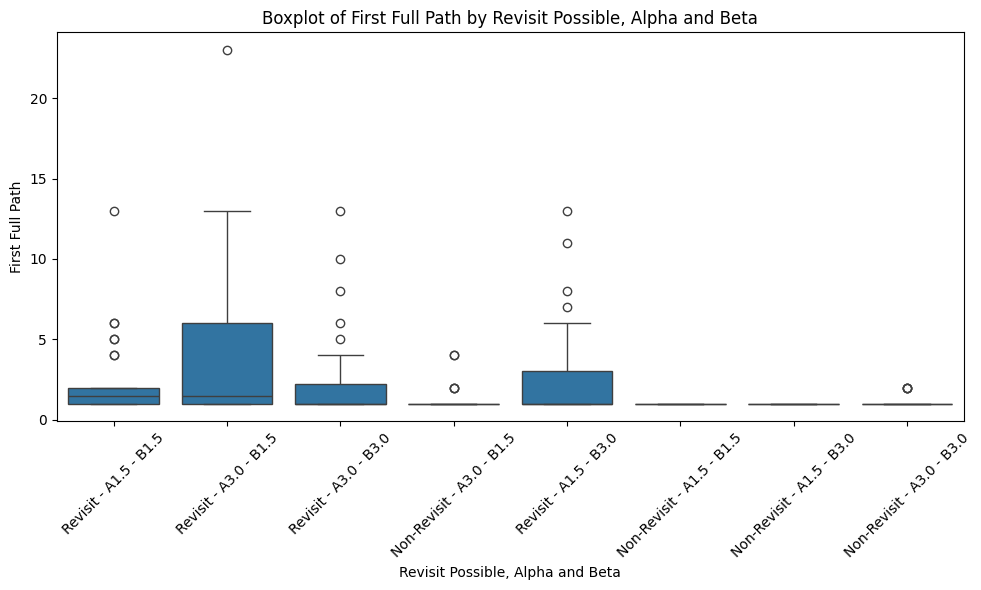

In [26]:
ga_aco_visualization = ga_aco_results.copy()

ga_aco_visualization["Revisit-Alpha-Beta Combination"] = ga_aco_visualization.apply(
    lambda row: f"{'Revisit' if row['Revisit Possible'] else 'Non-Revisit'} - A{row['Alpha']} - B{row['Beta']}", 
    axis=1
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Revisit-Alpha-Beta Combination", y="ACO First Full Path")
plt.title("Boxplot of First Full Path by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("First Full Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

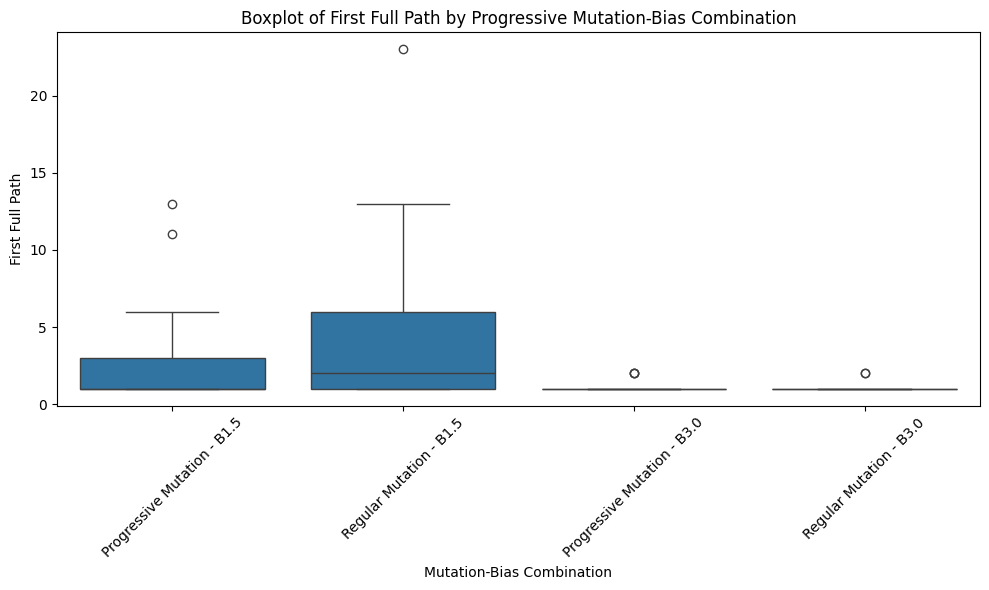

In [27]:
ga_aco_visualization["Mutation-Bias Combination"] = ga_aco_visualization.apply(
    lambda row: f"{'Progressive Mutation' if row['Progressive Mutation'] else 'Regular Mutation'} - B{row['Bias']}", 
    axis=1
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Mutation-Bias Combination", y="ACO First Full Path")
plt.title("Boxplot of First Full Path by Progressive Mutation-Bias Combination")
plt.xlabel("Mutation-Bias Combination")
plt.ylabel("First Full Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

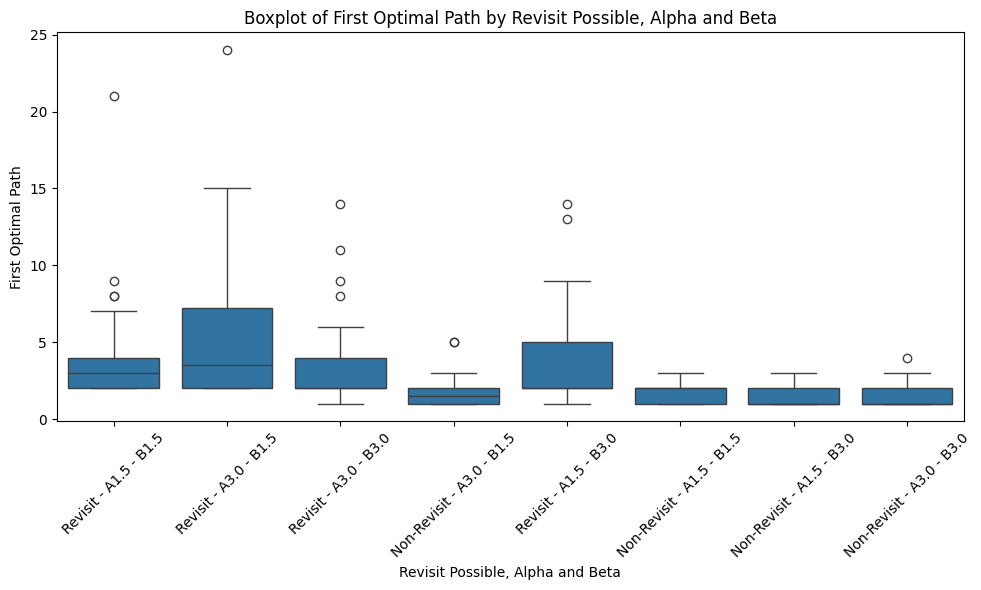

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Revisit-Alpha-Beta Combination", y="ACO First Optimal Path")
plt.title("Boxplot of First Optimal Path by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("First Optimal Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

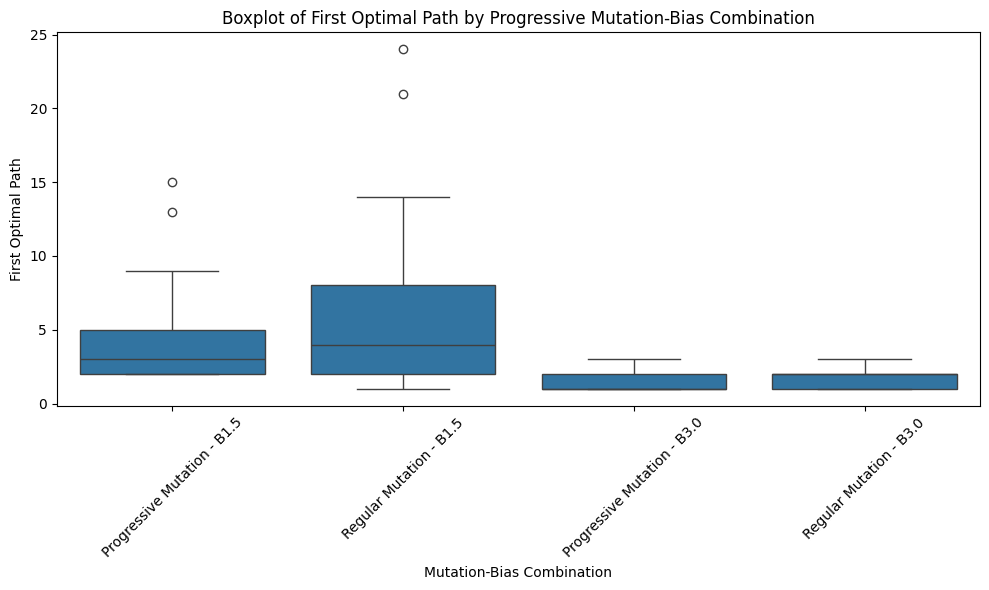

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Mutation-Bias Combination", y="ACO First Optimal Path")
plt.title("Boxplot of First Optimal Path by Progressive Mutation-Bias Combination")
plt.xlabel("Mutation-Bias Combination")
plt.ylabel("First Optimal Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

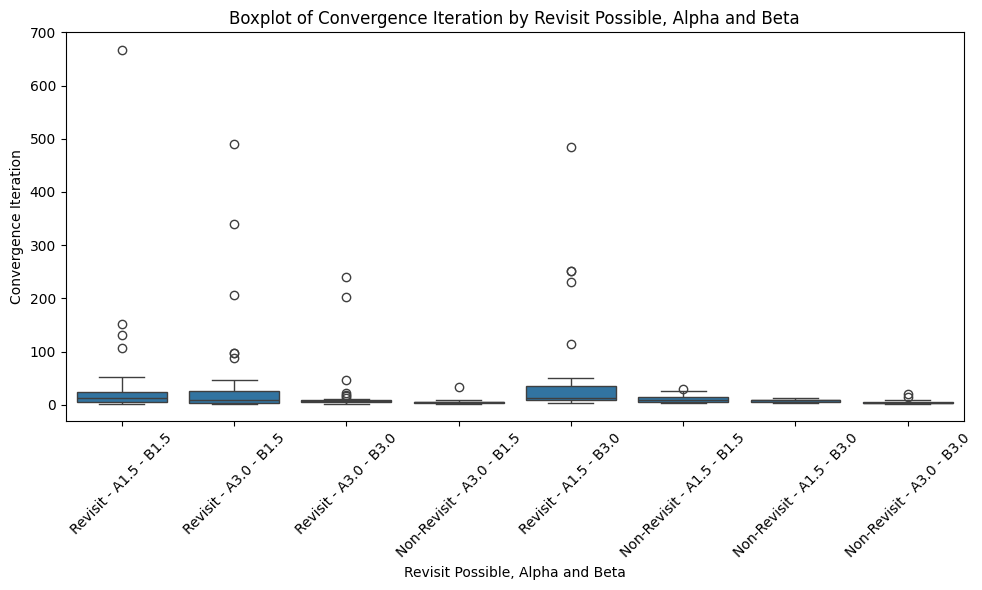

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Revisit-Alpha-Beta Combination", y="ACO Convergence Iteration")
plt.title("Boxplot of Convergence Iteration by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("Convergence Iteration")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

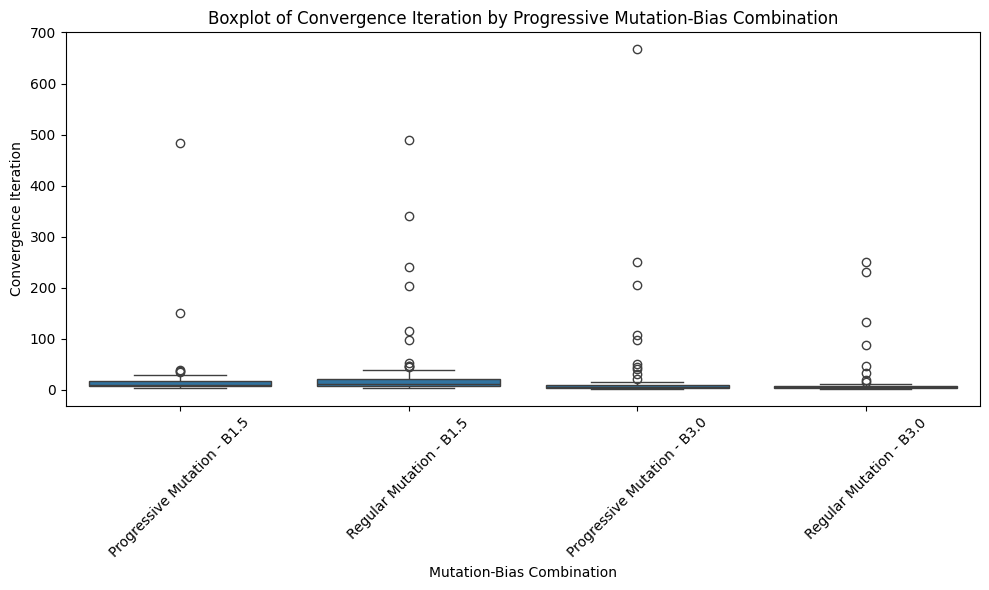

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Mutation-Bias Combination", y="ACO Convergence Iteration")
plt.title("Boxplot of Convergence Iteration by Progressive Mutation-Bias Combination")
plt.xlabel("Mutation-Bias Combination")
plt.ylabel("Convergence Iteration")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Time analysis

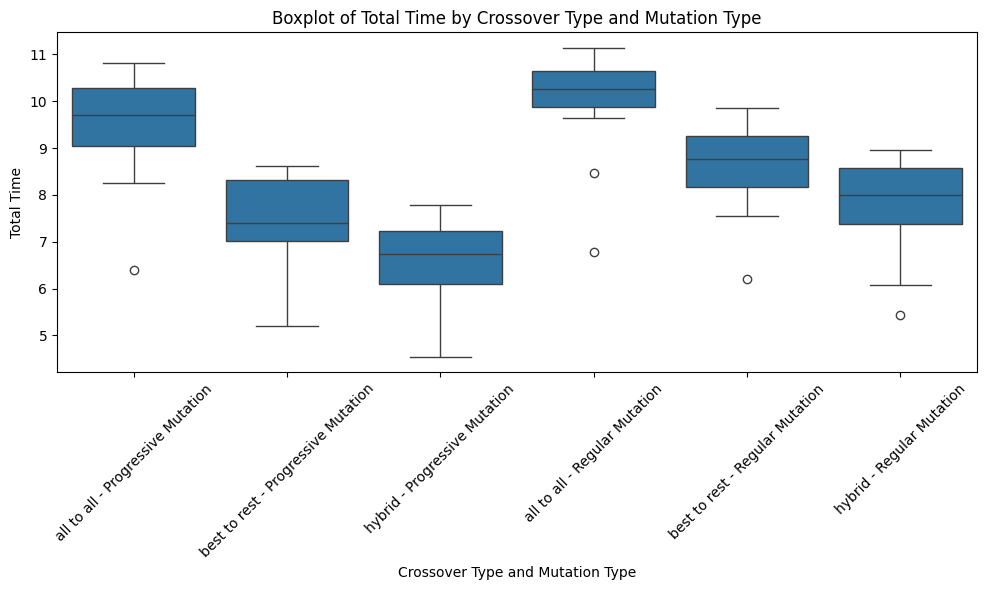

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_visualization, x="Crossover-Mutation Combination", y="Total Time")
plt.title("Boxplot of Total Time by Crossover Type and Mutation Type")
plt.xlabel("Crossover Type and Mutation Type")
plt.ylabel("Total Time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

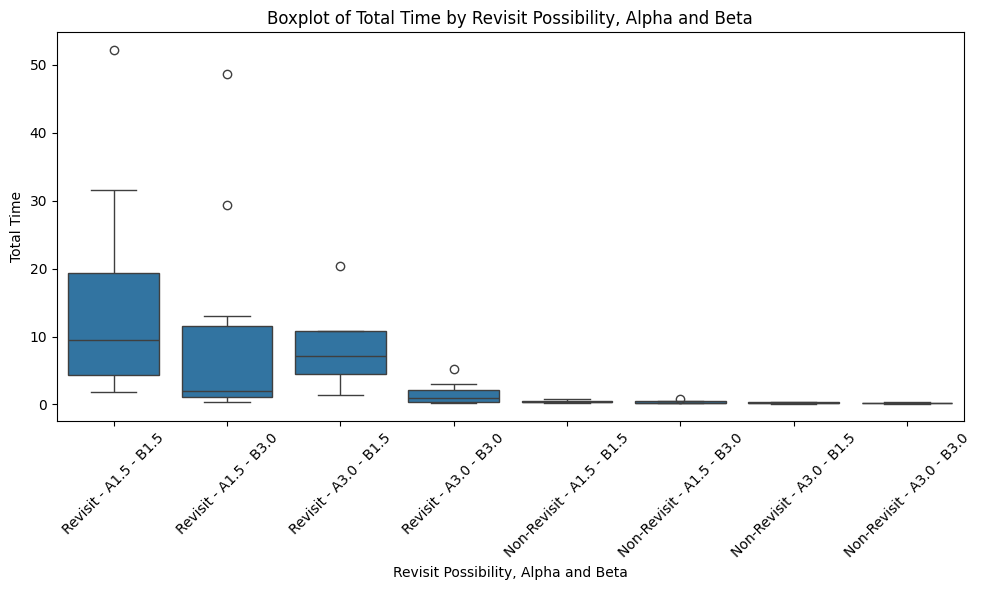

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aco_visualization, x="Revisit-Alpha-Beta Combination", y="Total Time")
plt.title("Boxplot of Total Time by Revisit Possibility, Alpha and Beta")
plt.xlabel("Revisit Possibility, Alpha and Beta")
plt.ylabel("Total Time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

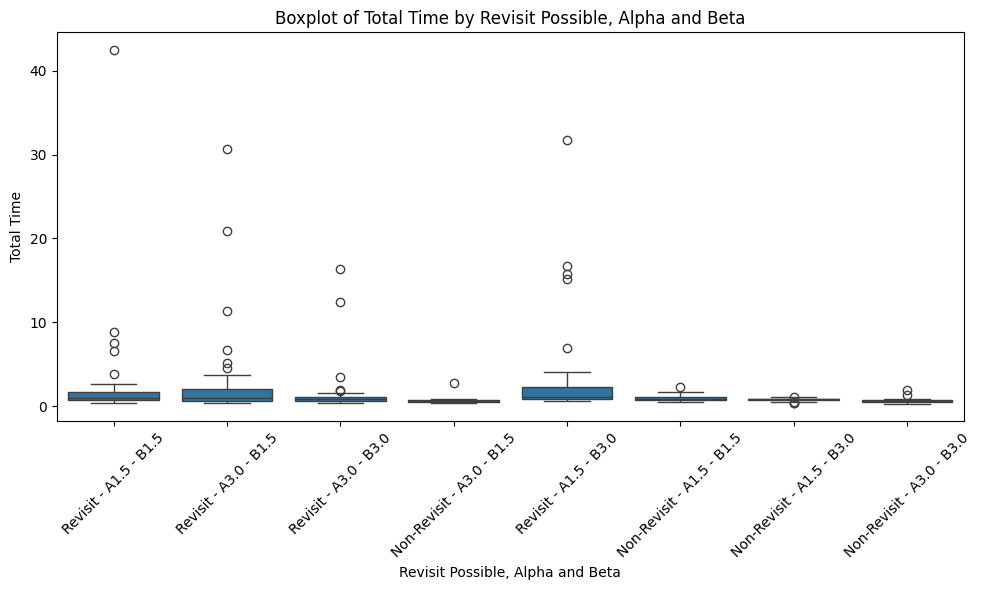

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Revisit-Alpha-Beta Combination", y="Total Time")
plt.title("Boxplot of Total Time by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("Total Time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

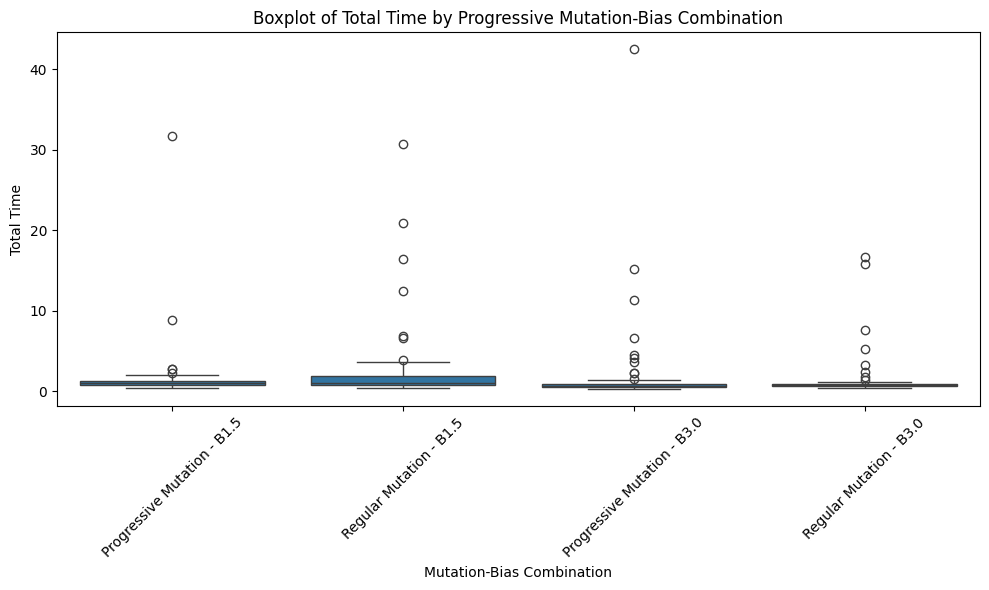

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Mutation-Bias Combination", y="Total Time")
plt.title("Boxplot of Total Time by Progressive Mutation-Bias Combination")
plt.xlabel("Mutation-Bias Combination")
plt.ylabel("Total Time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()